In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution

In [5]:
def excitation(pulse, period, dt=0, res=1):
    y = np.repeat([0., 1., 0.], [dt*res, pulse*res, (period-pulse-dt)*res])
    return y

def decay(tau, t_obs, a=1, c=0, res=1):
    t = np.arange(0, tau*t_obs, res)
    return a*np.exp(-t/tau) + c

In [17]:
# Square pulse
pulse = 50                 # Pulse Width (ms)
tau = 10                   # Lifetime of atom (ms)
t_obs = 10                 # Number of lifetimes to observe for
period = pulse + t_obs*tau     # Period (ms)

res = 1 # Time resolution (ms)

# Excitation pulse signal
# t_pulse = np.arange(0, pulse, res)
y_pulse = excitation(pulse=pulse, period=period, dt=10)

# Exponential decay signal
# t_decay = np.arange(0, decay, res)
y_decay = decay(tau, t_obs)

print('Intensity at the end of the decay signal: {0:.3g}%'.format(y_decay[-1]))

Intensity at the end of the decay signal: 5.02e-05%


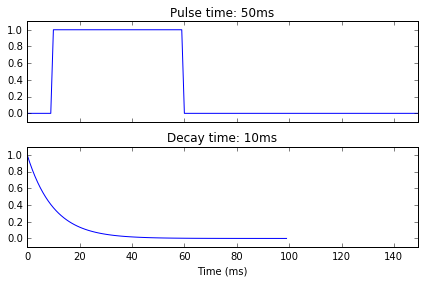

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

ax1.plot(y_pulse)
ax1.set_title('Pulse time: ' + str(pulse) + 'ms')
ax1.margins(0, 0.1)
ax2.plot(y_decay)
ax2.set_title('Decay time: ' + str(tau) + 'ms')
ax2.margins(0, 0.1)
ax2.set_xlabel('Time (ms)')

plt.tight_layout()

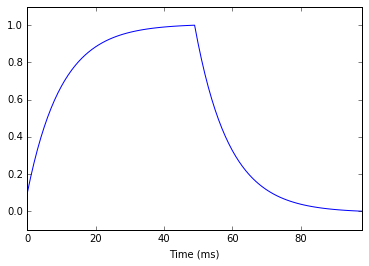

In [4]:
# Convolve
y = np.convolve(y_pulse, y_decay)
t_conv = np.linspace(0, period, len(y))
y = y/max(y)

plt.plot(y)
plt.margins(0, 0.1)
plt.xlabel('Time (ms)')

-50


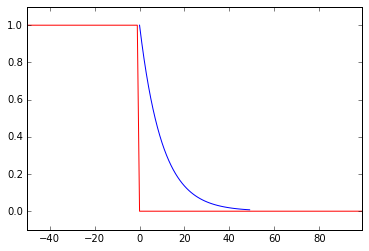

-49


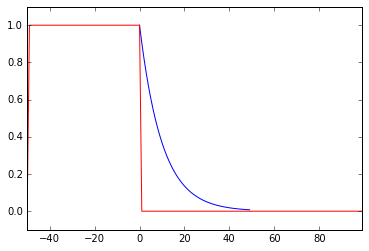

-48


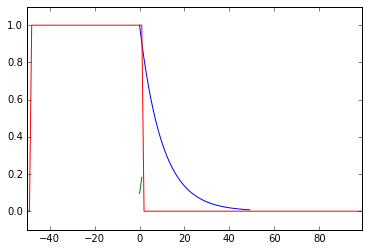

-47


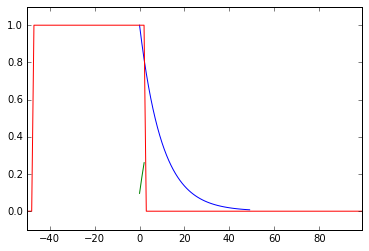

-46


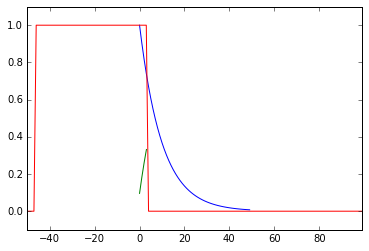

-45


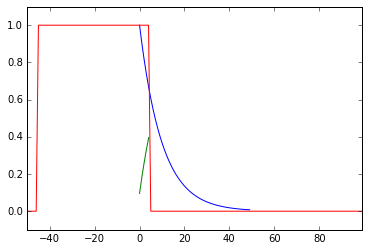

-44


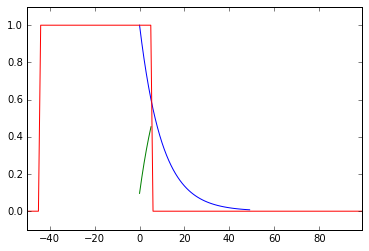

-43


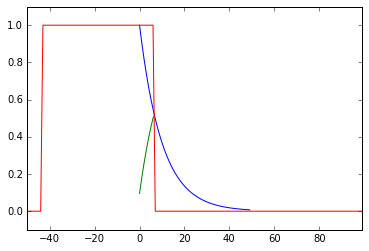

-42


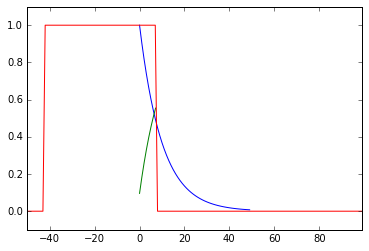

-41


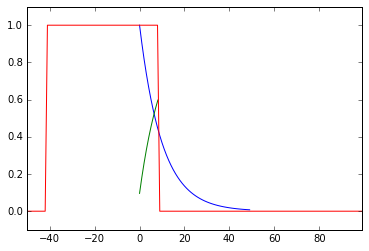

-40


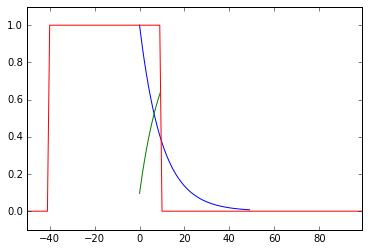

-39


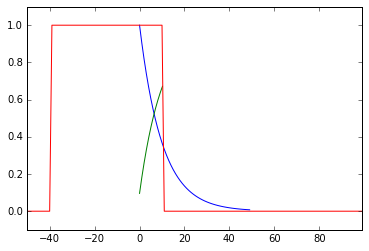

-38


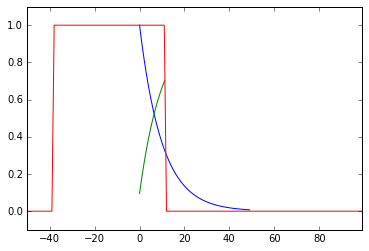

-37


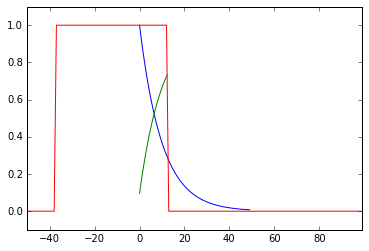

-36


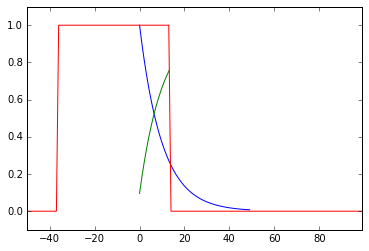

-35


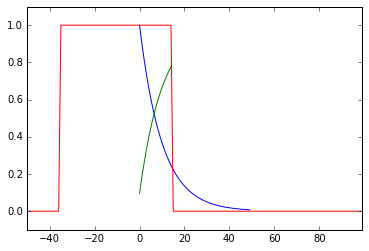

-34


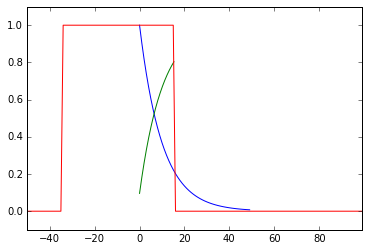

-33


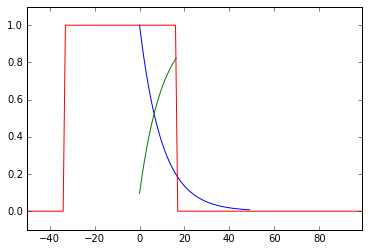

-32


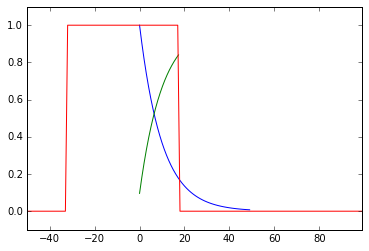

-31


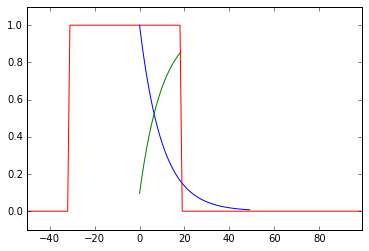

-30


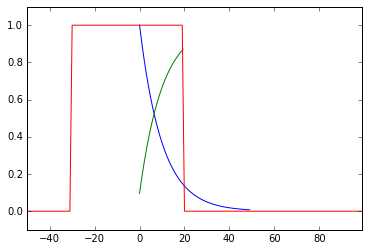

-29


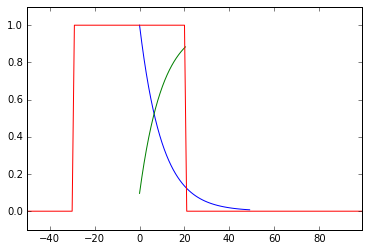

-28


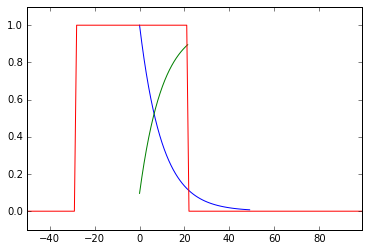

-27


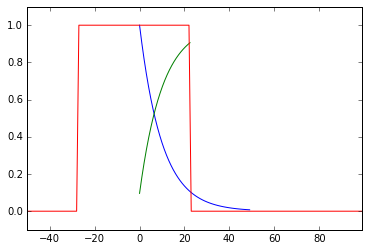

-26


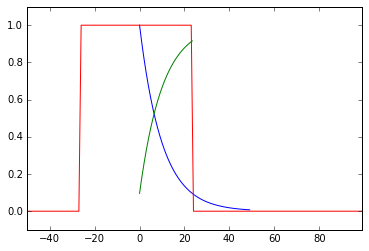

-25


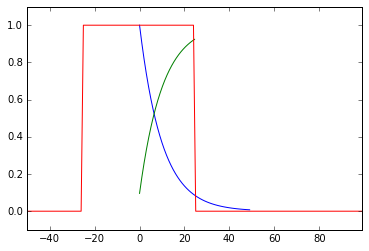

-24


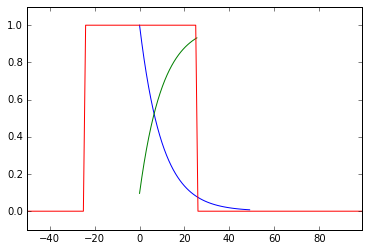

-23


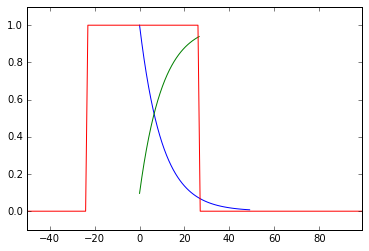

-22


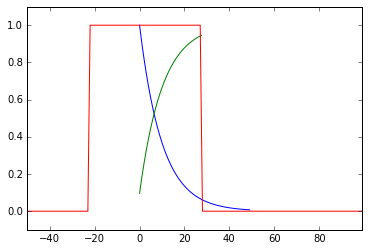

-21


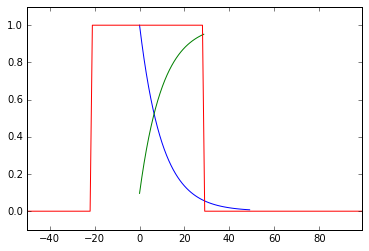

-20


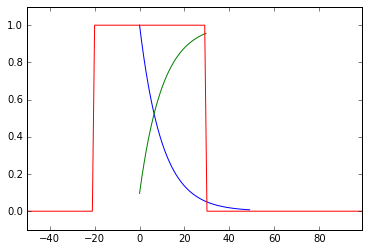

-19


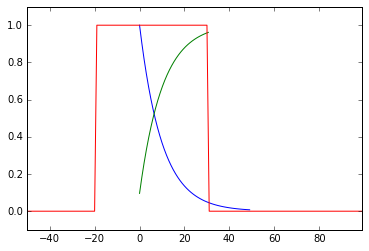

-18


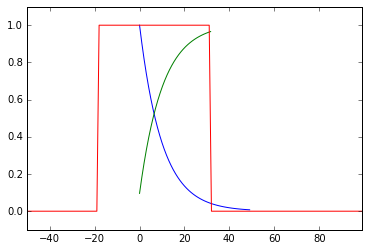

-17


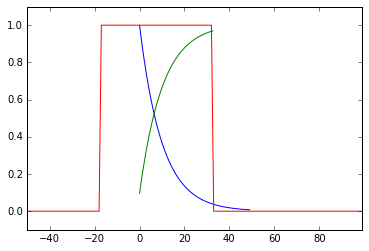

-16


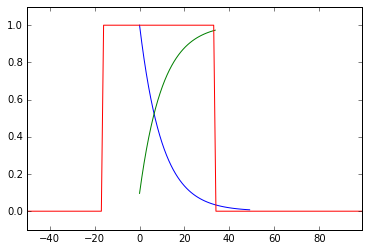

-15


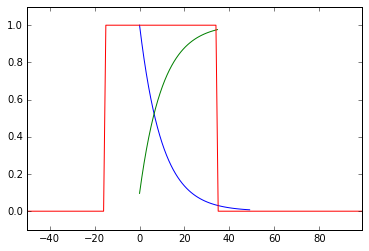

-14


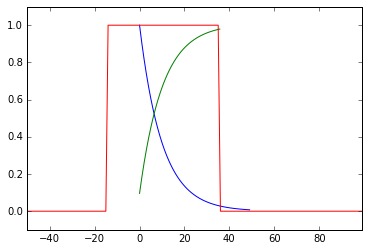

-13


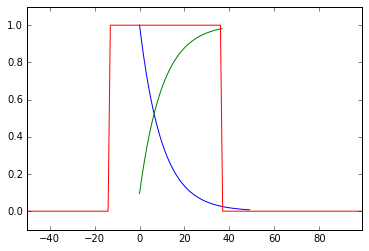

-12


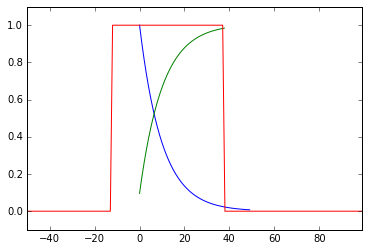

-11


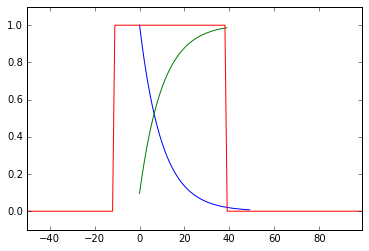

-10


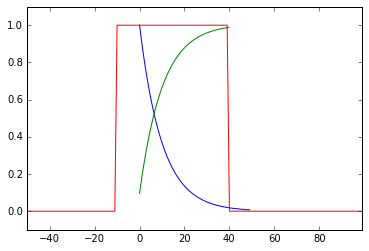

-9


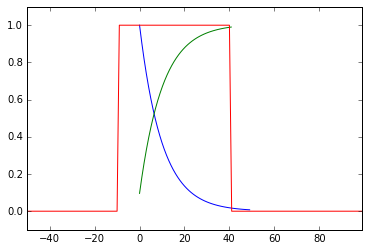

-8


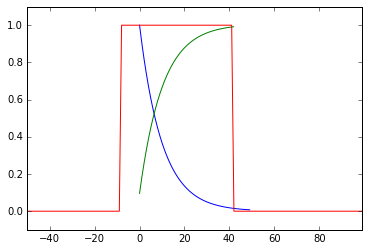

-7


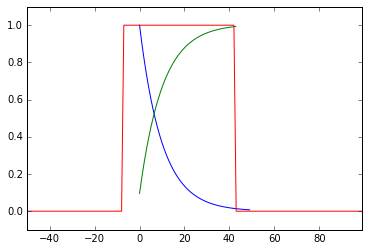

-6


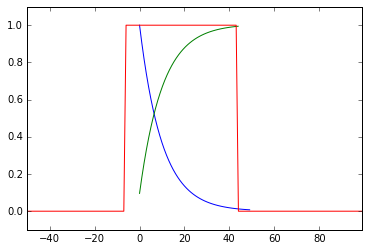

-5


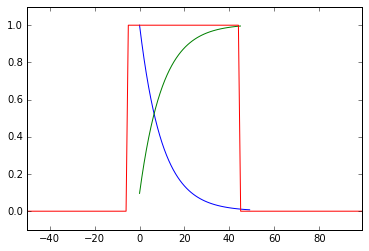

-4


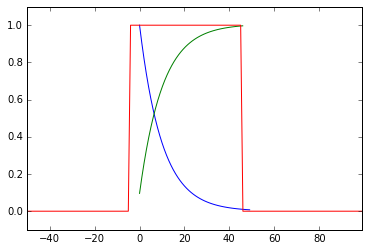

-3


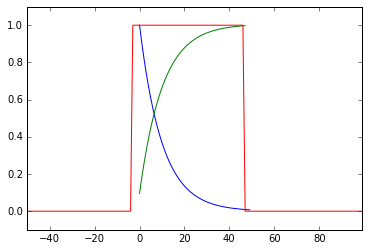

-2


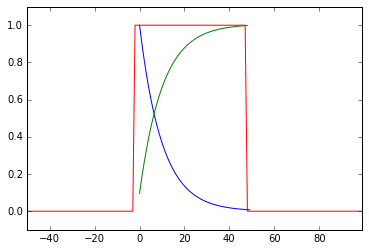

-1


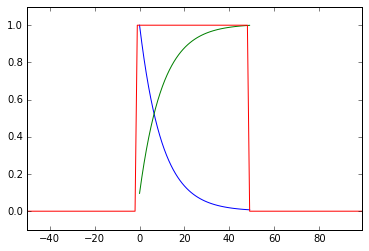

0


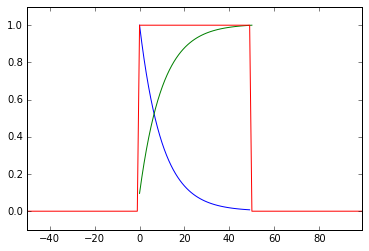

1


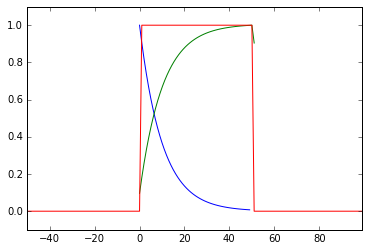

2


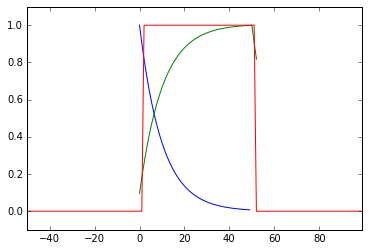

3


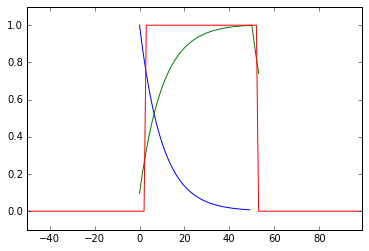

4


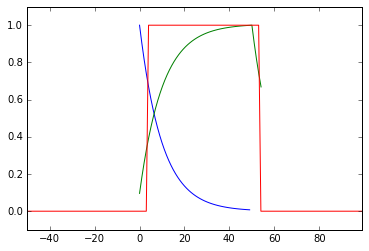

5


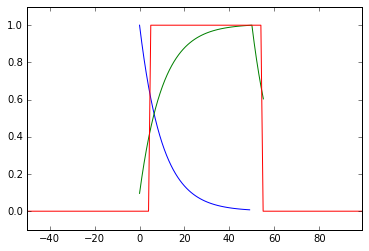

6


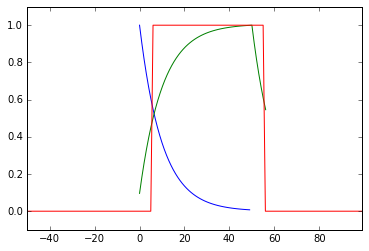

7


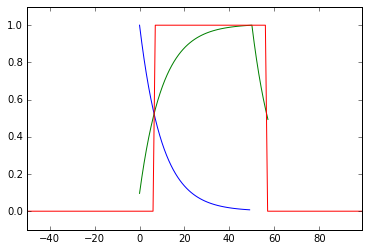

8


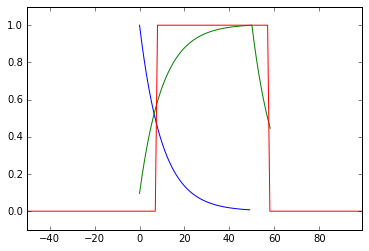

9


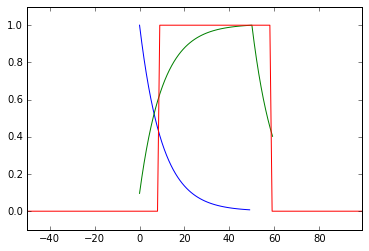

10


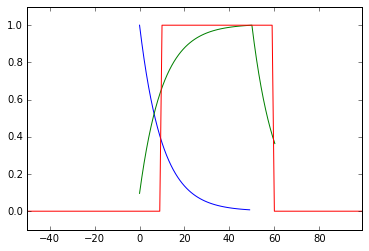

11


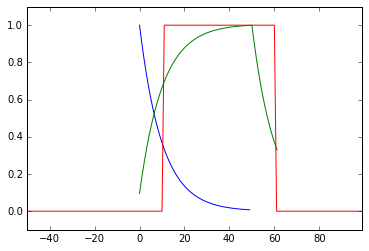

12


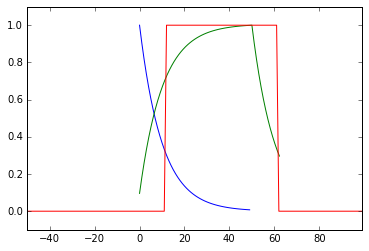

13


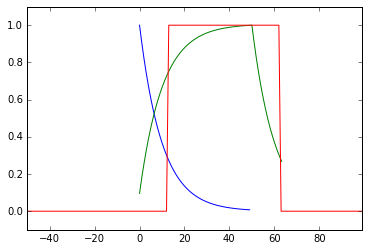

14


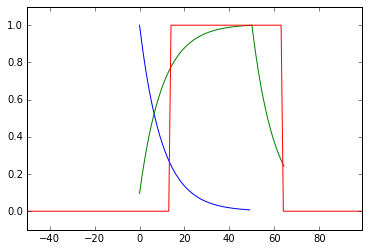

15


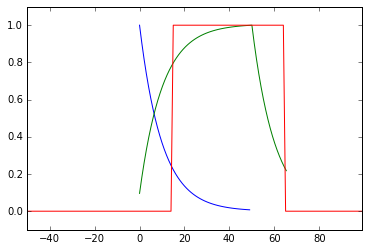

16


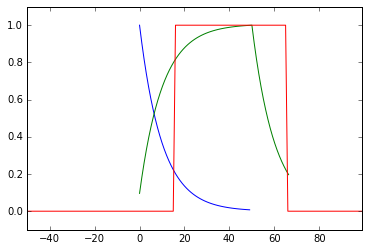

17


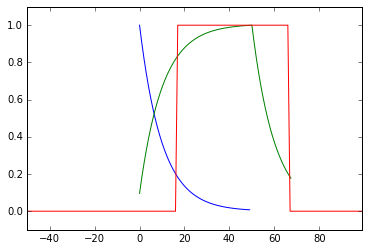

18


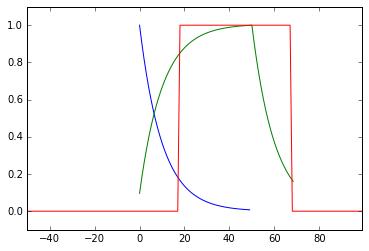

19


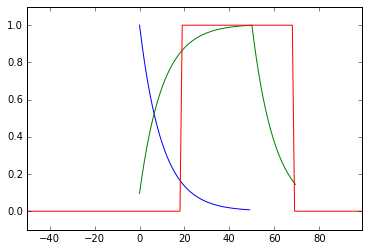

20


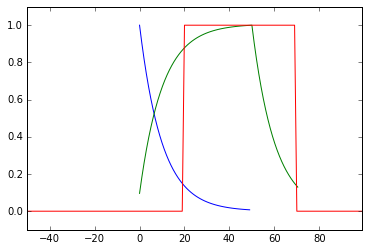

21


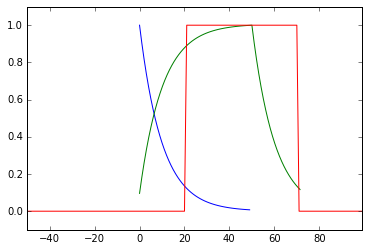

22


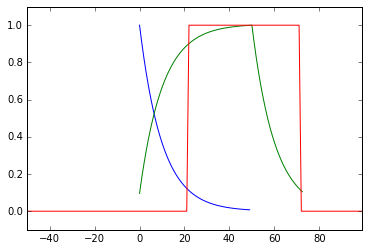

23


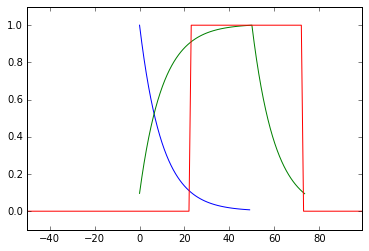

24


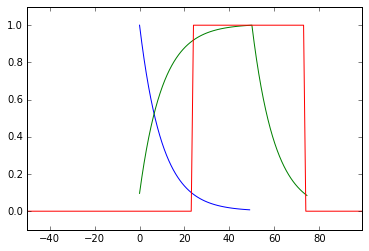

25


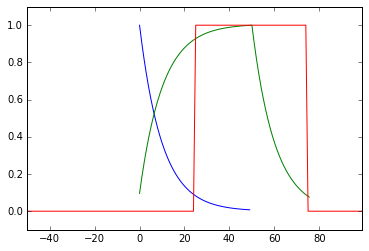

26


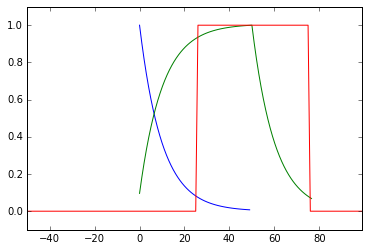

27


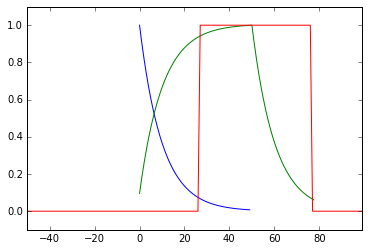

28


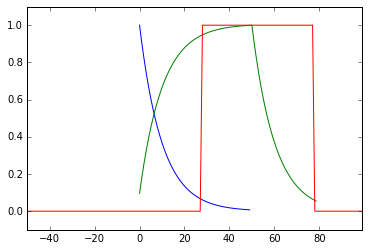

29


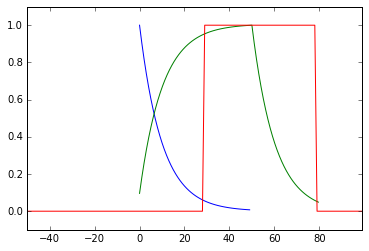

30


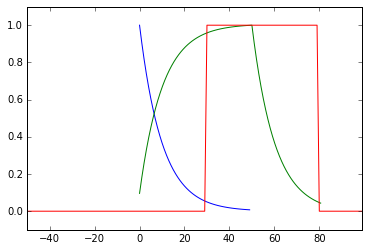

31


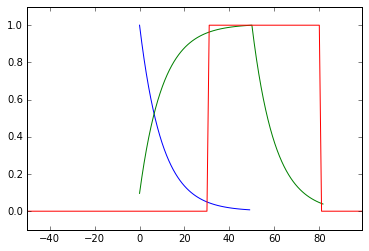

32


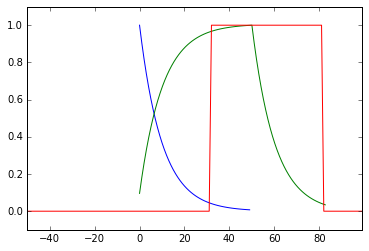

33


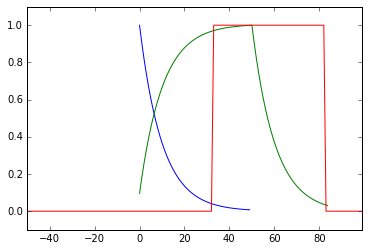

34


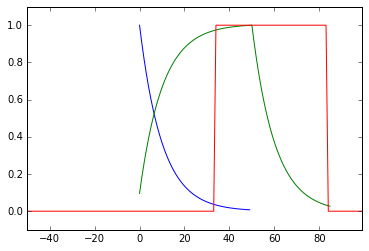

35


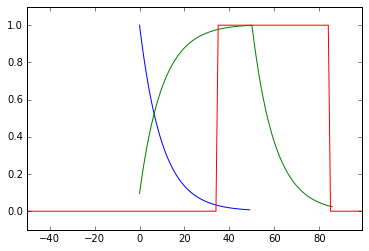

36


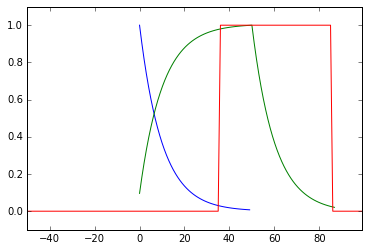

37


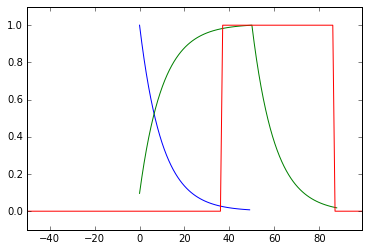

38


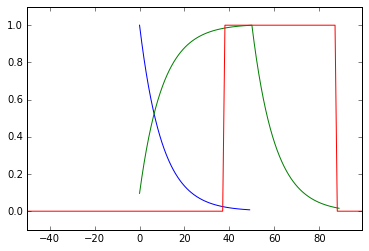

39


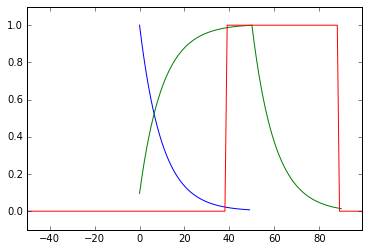

40


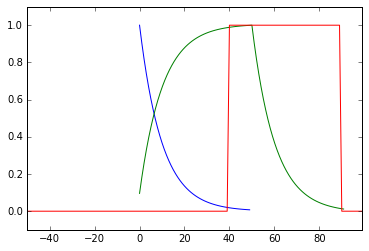

41


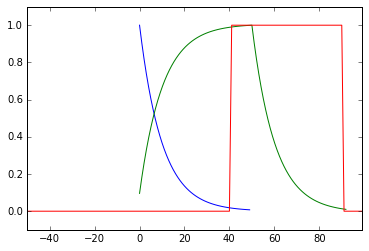

42


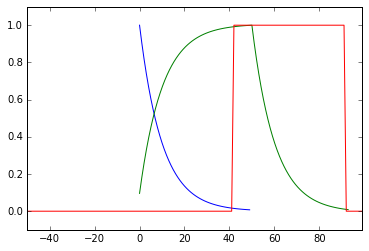

43


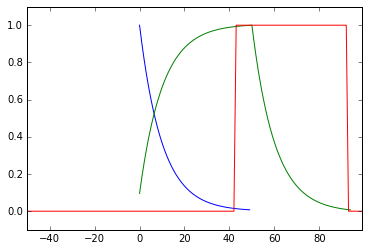

44


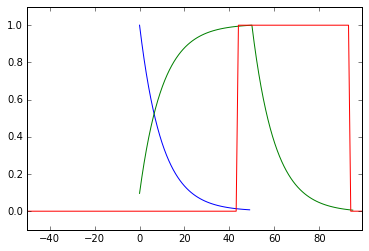

45


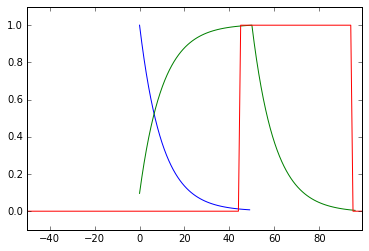

46


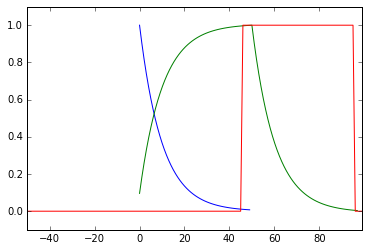

47


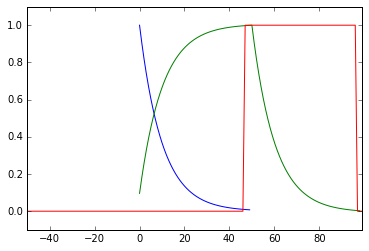

48


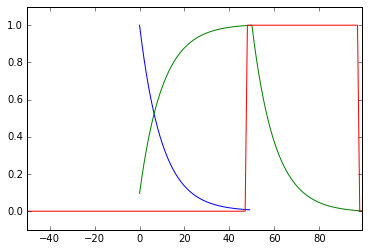

49


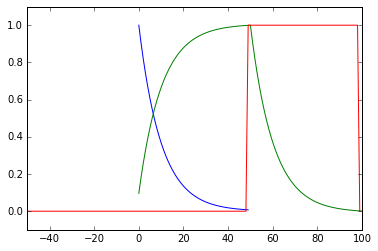

50


IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
import time 

sig = np.arange(-pulse, pulse, res)
for dt in sig:
    print(dt)
    excitation = np.zeros(len(sig))
    iloc_low = np.where(sig == dt)[0][0]
    iloc_high = np.where(sig == dt+pulse)[0][0]
    excitation[iloc_low:iloc_high] = 1

    # Plots
    plt.plot(t_decay, y_decay)
    plt.plot(t_conv[0:pulse+dt], y[0:pulse+dt])
    ln, = plt.plot(sig, excitation)
    
    plt.margins(0, 0.1)
    plt.show()
#     ln.remove()

/Users/Thomas/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


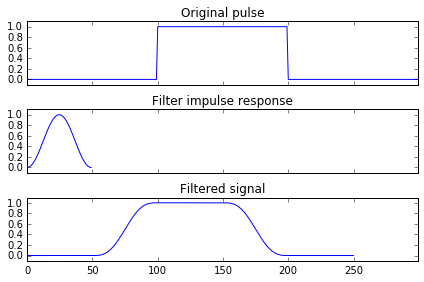

In [135]:
# Scipy Example
# http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.signal.convolve.html

from scipy import signal
sig = np.repeat([0., 1., 0.], 100)
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='valid') / sum(win)

import matplotlib.pyplot as plt
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

# Simulate Decay

In [4]:
# Add noise to exponential decay
N = 100      # Number of repititions
sizN = 0.5  # Size of noise

yn = np.zeros(len(y))
for i in range(0, N):
    noise = np.random.normal(0, sizN , len(y))
    yi = y + noise
    yn+=yi
 

# Intensity can not be negative 
array_np = np.asarray(yn)
low_values_indices = array_np < 0  # Where values are low
array_np[low_values_indices] = 0  # All low values set to 0


def model_func(t, a, tau, c):
    return a*np.exp(-t / tau) + c

# Non-linear fit
guess = [1, 10, 0]      # Initial guess for fit
popt, pcov = curve_fit(model_func, t[pulse:period], yn[pulse:period], p0=guess)
a, tauP, c = popt
perr = np.sqrt(np.diag(pcov))

# fig = plt.figure()
plt.plot(t[pulse:period], yn[pulse:period], 'o',
         t[pulse:period], N*y[pulse:period], '-',
         t[pulse:period], model_func(t[pulse:period], a, tauP, c), '--')
plt.title('Lifetime is {0:.3f} +- {1:.3f} ms (1s.d.)'.format(tauP, perr[1]))

# info at: http://stackoverflow.com/questions/3938042/fitting-exponential-decay-with-no-initial-guessing